In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r"D:\EOY Datasets\Full Datasets"+'\\'+'Everything_cleaned.csv',index_col=0)

C:\Users\ellio\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.head()

Crime_ID    Month  \
0  e9a50727f2189e0c50f704e3661bc1a8ae3a39aece4866...  2019-01   
1  fb06f54e9d633a961109ef74171e4beb40b2fe44e57a10...  2019-01   
2  4655ba031d5c8d00b247577a22472fbb8f9130d98b7d95...  2019-01   
3  2830f28a4a93138717182d1cc51b6d77cfaf3c27398934...  2019-01   
4  ca01d599d45f6e1d1bc5b05ddc6a1b559870fc831baa8e...  2019-01   

         Reported_by                    Crime_type  \
0  Avon and Somerset  Violence and sexual offences   
1  Avon and Somerset  Violence and sexual offences   
2  Avon and Somerset  Violence and sexual offences   
3  Avon and Somerset                Theft offences   
4  Avon and Somerset                Theft offences   

                  Outcome_type  Year Level_of_Lockdown      Region  
0        No suspect identified  2019       No Lockdown  South West  
1  Unable to prosecute suspect  2019       No Lockdown  South West  
2        No suspect identified  2019       No Lockdown  South West  
3        No suspect identified  2019       No Lockdown  South West  
4        No suspect identified  2019       No Lockdown  South West

In [5]:
df['Outcome_type'].value_counts()

No suspect identified          4335683
Unable to prosecute suspect    4136664
Other Outcome                   913747
Suspect charged                 824639
Name: Outcome_type, dtype: int64

In [6]:
grouped = df.groupby(['Level_of_Lockdown','Region','Crime_type'])['Crime_ID'].count().reset_index().rename(columns={'Crime_ID': 'Number_of_Arrests'})

In [7]:
grouped

Level_of_Lockdown         Region                    Crime_type  \
0               High  East Midlands     Criminal damage and arson   
1               High  East Midlands                 Drug offences   
2               High  East Midlands         Public order offences   
3               High  East Midlands                Theft offences   
4               High  East Midlands  Violence and sexual offences   
..               ...            ...                           ...   
70       No Lockdown  West Midlands     Criminal damage and arson   
71       No Lockdown  West Midlands                 Drug offences   
72       No Lockdown  West Midlands         Public order offences   
73       No Lockdown  West Midlands                Theft offences   
74       No Lockdown  West Midlands  Violence and sexual offences   

    Number_of_Arrests  
0              103825  
1               29878  
2              102027  
3              204775  
4              384423  
..                ...  
70             102718  
71              27994  
72              81926  
73             253496  
74             356716  

[75 rows x 4 columns]

<AxesSubplot:>

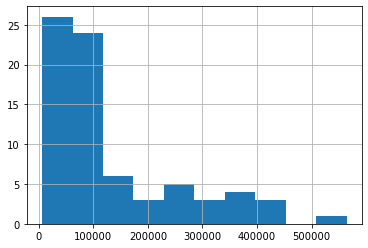

In [8]:
grouped['Number_of_Arrests'].hist()

In [9]:
grouped['Arrests_Ranked'] = pd.cut(grouped.Number_of_Arrests,bins=np.arange(0,650000,50000),include_lowest=False)
grouped

Level_of_Lockdown         Region                    Crime_type  \
0               High  East Midlands     Criminal damage and arson   
1               High  East Midlands                 Drug offences   
2               High  East Midlands         Public order offences   
3               High  East Midlands                Theft offences   
4               High  East Midlands  Violence and sexual offences   
..               ...            ...                           ...   
70       No Lockdown  West Midlands     Criminal damage and arson   
71       No Lockdown  West Midlands                 Drug offences   
72       No Lockdown  West Midlands         Public order offences   
73       No Lockdown  West Midlands                Theft offences   
74       No Lockdown  West Midlands  Violence and sexual offences   

    Number_of_Arrests    Arrests_Ranked  
0              103825  (100000, 150000]  
1               29878        (0, 50000]  
2              102027  (100000, 150000]  
3              204775  (200000, 250000]  
4              384423  (350000, 400000]  
..                ...               ...  
70             102718  (100000, 150000]  
71              27994        (0, 50000]  
72              81926   (50000, 100000]  
73             253496  (250000, 300000]  
74             356716  (350000, 400000]  

[75 rows x 5 columns]

In [10]:
grouped.Arrests_Ranked = grouped.Arrests_Ranked.astype('str').str.replace(',','.',regex=True)

In [11]:
display(grouped)

Level_of_Lockdown         Region                    Crime_type  \
0               High  East Midlands     Criminal damage and arson   
1               High  East Midlands                 Drug offences   
2               High  East Midlands         Public order offences   
3               High  East Midlands                Theft offences   
4               High  East Midlands  Violence and sexual offences   
..               ...            ...                           ...   
70       No Lockdown  West Midlands     Criminal damage and arson   
71       No Lockdown  West Midlands                 Drug offences   
72       No Lockdown  West Midlands         Public order offences   
73       No Lockdown  West Midlands                Theft offences   
74       No Lockdown  West Midlands  Violence and sexual offences   

    Number_of_Arrests    Arrests_Ranked  
0              103825  (100000. 150000]  
1               29878        (0. 50000]  
2              102027  (100000. 150000]  
3              204775  (200000. 250000]  
4              384423  (350000. 400000]  
..                ...               ...  
70             102718  (100000. 150000]  
71              27994        (0. 50000]  
72              81926   (50000. 100000]  
73             253496  (250000. 300000]  
74             356716  (350000. 400000]  

[75 rows x 5 columns]

In [12]:
grouped[grouped.Arrests_Ranked == np.nan]

Empty DataFrame
Columns: [Level_of_Lockdown, Region, Crime_type, Number_of_Arrests, Arrests_Ranked]
Index: []

In [13]:
grouped.Arrests_Ranked.unique()

array(['(100000. 150000]', '(0. 50000]', '(200000. 250000]',
       '(350000. 400000]', '(50000. 100000]', '(400000. 450000]',
       '(550000. 600000]', '(150000. 200000]', '(300000. 350000]',
       '(450000. 500000]', '(250000. 300000]'], dtype=object)

In [15]:
df.Reported_by.unique()

array(['Avon and Somerset', 'Cambridgeshire', 'Cheshire', 'Cleveland',
       'Cumbria', 'Derbyshire', 'Devon & Cornwall', 'Dorset', 'Durham',
       'Dyfed-Powys', 'Gloucestershire', 'Greater Manchester', 'Gwent',
       'Humberside', 'Lancashire', 'Leicestershire', 'Lincolnshire',
       'Merseyside', 'Norfolk', 'North Wales', 'North Yorkshire',
       'Northamptonshire', 'Northumbria', 'Nottinghamshire',
       'South Wales', 'South Yorkshire', 'Staffordshire', 'Suffolk',
       'Warwickshire', 'West Mercia', 'West Midlands', 'West Yorkshire',
       'Wiltshire', 'Bedfordshire', 'City of London', 'Essex',
       'Hampshire', 'Hertfordshire', 'Kent', 'Metropolitan', 'Surrey',
       'Sussex', 'Thames Valley'], dtype=object)

In [14]:
#grouped.to_csv('test_group.csv')